In [1]:
import pandas as pd
data="data.CSV"
data = pd.read_csv(data)
data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [2]:
data.dtypes

Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

In [3]:
"""
print(data_clean['Blood_Pressure_Abnormality'].unique())
print(data_clean['Sex'].unique())
print(data_clean['Level_of_Stress'].unique())
print(data_clean['Chronic_kidney_disease'].unique())
print(data_clean['Adrenal_and_thyroid_disorders'].unique())
"""

"\nprint(data_clean['Blood_Pressure_Abnormality'].unique())\nprint(data_clean['Sex'].unique())\nprint(data_clean['Level_of_Stress'].unique())\nprint(data_clean['Chronic_kidney_disease'].unique())\nprint(data_clean['Adrenal_and_thyroid_disorders'].unique())\n"

In [4]:
# Removing olumns=['Pregnancy'] as it contains missing data wiht 78%
data_drop = data.drop(columns=['Pregnancy'])
data_drop.head()


,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,0,15619,49644,397.0,2,0,0


In [5]:
# Removing Missing Values
#Removing rows with missing data
mask = data_drop.isnull().any(axis=1)
print(mask)
# calculate number of rows with missing data
num_of_rows_with_nan = mask.sum()
 # print the ratio of rows with missing data
data_clean = data_drop[~mask]
print('the ratio of rows with missing data:', num_of_rows_with_nan/len(data_drop))

0        True
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998    False
1999    False
Length: 2000, dtype: bool
the ratio of rows with missing data: 0.1615


In [6]:
"""# Filling missing values
# Filling with column average
col_averages = data_drop.mean(axis=0)
data_clean = data_drop.fillna(col_averages)
data_clean.head()"""

'# Filling missing values\n# Filling with column average\ncol_averages = data_drop.mean(axis=0)\ndata_clean = data_drop.fillna(col_averages)\ndata_clean.head()'

In [7]:
mask_col = data_clean.isnull().any(axis=0)
print(mask_col)
mask_row= data_clean.isnull().any(axis=1)
print(mask_row)
mask_row.unique()

Patient_Number                   False
Blood_Pressure_Abnormality       False
Level_of_Hemoglobin              False
Genetic_Pedigree_Coefficient     False
Age                              False
BMI                              False
Sex                              False
Smoking                          False
Physical_activity                False
salt_content_in_the_diet         False
alcohol_consumption_per_day      False
Level_of_Stress                  False
Chronic_kidney_disease           False
Adrenal_and_thyroid_disorders    False
dtype: bool
1       False
2       False
3       False
4       False
6       False
        ...  
1993    False
1994    False
1995    False
1998    False
1999    False
Length: 1677, dtype: bool


array([False])

In [8]:
data_input = data_clean.drop(columns=['Patient_Number', 'Blood_Pressure_Abnormality'])
data_input

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
1,9.75,0.23,54,33,1,0,26106,25333,205.0,3,0,0
2,10.79,0.91,70,49,0,0,9995,29465,67.0,2,1,0
3,11.00,0.43,71,50,0,0,10635,7439,242.0,1,1,0
4,14.17,0.83,52,19,0,0,15619,49644,397.0,2,0,0
6,11.69,0.75,43,41,1,0,38369,32967,206.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1993,9.69,1.00,73,42,1,1,43344,36230,48.0,3,0,1
1994,11.07,0.66,58,31,1,0,38603,22836,379.0,2,0,0
1995,10.14,0.02,69,26,1,1,26118,47568,144.0,3,1,0
1998,11.15,0.72,46,45,1,1,18157,15275,253.0,3,0,1


In [9]:
data_output = data_clean['Blood_Pressure_Abnormality']
data_output

1       0
2       1
3       0
4       1
6       1
       ..
1993    0
1994    0
1995    1
1998    0
1999    1
Name: Blood_Pressure_Abnormality, Length: 1677, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# splitting 33% for testing
X, X_test, y, y_test = train_test_split(
    data_input, data_output, test_size=0.33, random_state=2)

# splitting the remaining part (X, y) to training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.33, random_state=2)

In [13]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (752, 12)
y_train: (752,)
------------
X_val: (371, 12)
y_val: (371,)
------------
X_test: (554, 12)
y_test: (554,)


In [14]:
print('Train size =', X_train.shape[0])
print('Val size =', X_val.shape[0])
print('Test size =', X_test.shape[0])

Train size = 752
Val size = 371
Test size = 554


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# we are going to try these values
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8]
# we store the accuracy values of our experiments in two lists
# (for training and validation)
training_accuracy_values = []
validation_accuracy_values = []
# we loop over the max_depth_values
for max_depth_val in max_depth_values:
    # create the model
    model = DecisionTreeClassifier(max_depth=max_depth_val, random_state=2)
    # train the model
    model.fit(X_train_scaled, y_train)
    # calculate the training and validation accuracy
    y_pred_train = model.predict(X_train_scaled)
    y_pred_val = model.predict(X_val_scaled)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    # add these results to the lists
    training_accuracy_values.append(acc_train)
    validation_accuracy_values.append(acc_val)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

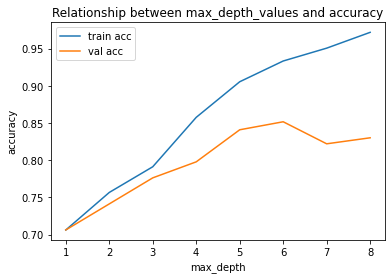

In [18]:
plt.plot(max_depth_values, training_accuracy_values, label="train acc")
plt.plot(max_depth_values, validation_accuracy_values, label="val acc")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Relationship between max_depth_values and accuracy')
plt.legend()
plt.show()

In [19]:
min_samples_leaf_values=[2,3,4,5,6,7,8]
training_accuracy_values = []
validation_accuracy_values = []
for min_samples_leaf_val in min_samples_leaf_values:
    
    # create the model
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf_val, 
                                   random_state=2)
    
    # train the model
    model.fit(X_train, y_train)
    
    # calculate the training and validation accuracy
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    
    # add these results to the lists
    training_accuracy_values.append(acc_train)
    validation_accuracy_values.append(acc_val)

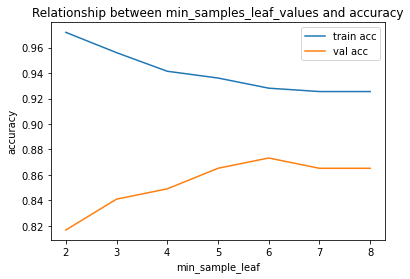

In [20]:
plt.plot(min_samples_leaf_values, training_accuracy_values, label="train acc")
plt.plot(min_samples_leaf_values, validation_accuracy_values, label="val acc")
plt.xlabel('min_sample_leaf')
plt.ylabel('accuracy')
plt.title('Relationship between min_samples_leaf_values and accuracy')
plt.legend()
plt.show()

In [21]:
model_best = DecisionTreeClassifier(max_depth=2, random_state=2)
model_best.fit(X_train, y_train)
y_pred_train = model_best.predict(X_train)
y_pred_val = model_best.predict(X_val)
print('Training accuracy =', accuracy_score(y_train, y_pred_train))
print('Validation accuracy =', accuracy_score(y_val, y_pred_val))

Training accuracy = 0.7566489361702128
Validation accuracy = 0.7412398921832885


In [25]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_scaled, y_train)
y_pred_train1 = gaussian_nb.predict(X_train_scaled)
y_pred_val1 = gaussian_nb.predict(X_val_scaled)
acc_train1 = accuracy_score(y_train, y_pred_train1)
acc_val1 = accuracy_score(y_val, y_pred_val1)
print('Training accuracy of NB =', acc_train1)
print('Validation accuracy of NB =', acc_val1)

Training accuracy of NB = 0.8577127659574468
Validation accuracy of NB = 0.8409703504043127


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [27]:
logistic_clf = LogisticRegression(random_state=2)
svc_clf = SVC(random_state=2)

In [34]:
logistic_clf.fit(X_train_scaled, y_train)
y_pred_train_log = logistic_clf.predict(X_train_scaled)
y_pred_val_log = logistic_clf.predict(X_val_scaled)
acc_train_log = accuracy_score(y_train, y_pred_train_log)
acc_val_log = accuracy_score(y_val, y_pred_val_log)
print('Accuracy of Training of logistic_clf', acc_train_log)
print('Accuracy of Validation of logistic_clf', acc_val_log)
print('------------------------------')
svc_clf.fit(X_train_scaled, y_train)
y_pred_train_svc = svc_clf.predict(X_train_scaled)
y_pred_val_svc = svc_clf.predict(X_val_scaled)
acc_train_svc = accuracy_score(y_train, y_pred_train_svc)
acc_val_svc = accuracy_score(y_val, y_pred_val_svc)
print('Accuracy of Training of svc_clf', acc_train_svc)
print('Accuracy of Validation of svc_clf', acc_val_svc)
 

Accuracy of Training of logistic_clf 0.7034574468085106
Accuracy of Validation of logistic_clf 0.7088948787061995
------------------------------
Accuracy of Training of svc_clf 0.9162234042553191
Accuracy of Validation of svc_clf 0.8194070080862533


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=2)
rf_clf.fit(X_train_scaled, y_train)
y_pred_train_rf = rf_clf.predict(X_train_scaled)
y_pred_val_rf = rf_clf.predict(X_val_scaled)
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
acc_val_rf = accuracy_score(y_val, y_pred_val_rf)
print('Accuracy of Training of rf_clf', acc_train_rf)
print('Accuracy of Validation of rf_clf', acc_val_rf)
 

Accuracy of Training of rf_clf 0.9707446808510638
Accuracy of Validation of rf_clf 0.8921832884097035


In [37]:
from sklearn.ensemble import ExtraTreesClassifier
ex_clf = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=2)
ex_clf.fit(X_train_scaled, y_train)
y_pred_train_ex = ex_clf.predict(X_train_scaled)
y_pred_val_ex = ex_clf.predict(X_val_scaled)
acc_train_ex = accuracy_score(y_train, y_pred_train_ex)
acc_val_ex = accuracy_score(y_val, y_pred_val_ex)
print('Accuracy of Training of rf_clf', acc_train_ex)
print('Accuracy of Validation of rf_clf', acc_val_ex)
 

Accuracy of Training of rf_clf 0.7952127659574468
Accuracy of Validation of rf_clf 0.7762803234501348


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbct_clf = GradientBoostingClassifier(max_depth=3, n_estimators=500, learning_rate=0.05, random_state=2)
gbct_clf.fit(X_train_scaled, y_train)
y_pred_train_gbct = gbct_clf.predict(X_train_scaled)
y_pred_val_gbct = gbct_clf.predict(X_val_scaled)
acc_train_gbct = accuracy_score(y_train, y_pred_train_gbct)
acc_val_gbct = accuracy_score(y_val, y_pred_val_gbct)
print('Accuracy of Training of gbct_clf', acc_train_gbct)
print('Accuracy of Validation of gbct_clf', acc_val_gbct)
 

Accuracy of Training of gbct_clf 1.0
Accuracy of Validation of gbct_clf 0.8867924528301887
